In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

C:\Users\yelamin\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Import the dataset
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [3]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

In [4]:
#Display some digits
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

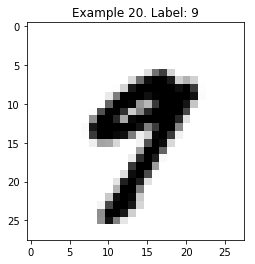

In [6]:
display(20)

SyntaxError: invalid syntax (<ipython-input-10-f1a85832a647>, line 1)

In [14]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x00000000129597B8>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

In [17]:
classifier.evaluate(test_data, test_labels)

{'loss': 0.31026545, 'accuracy': 0.9137, 'global_step': 1000}

Predicted 7, Label: 7


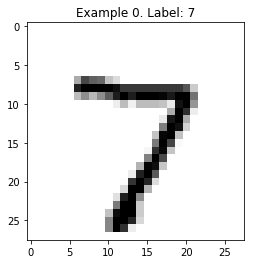

In [25]:
# Classsifing new example
# here's one it gets right
#classifier.predict(test_data[0], test_labels[0])

prediction = classifier.predict(np.array([test_data[0]], dtype=float), as_iterable=False)
print("Predicted %d, Label: %d" % (prediction, test_labels[0]))
display(0)


Predicted 6, Label: 5


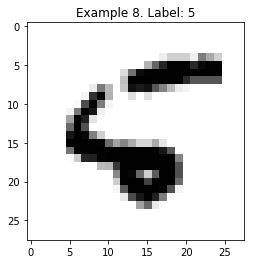

In [27]:
prediction = classifier.predict(np.array([test_data[8]], dtype=float), as_iterable=False)
print("Predicted %d, Label: %d" % (prediction, test_labels[8]))
display(8)

Predicted 0, Label: 0


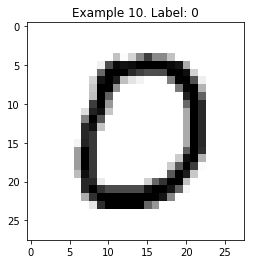

In [28]:
prediction = classifier.predict(np.array([test_data[10]], dtype=float), as_iterable=False)
print("Predicted %d, Label: %d" % (prediction, test_labels[10]))
display(10)

Predicted 9, Label: 9


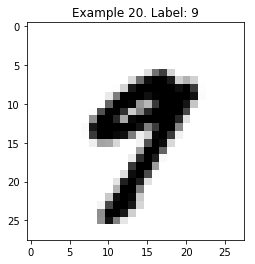

In [29]:
prediction = classifier.predict(np.array([test_data[20]], dtype=float), as_iterable=False)
print("Predicted %d, Label: %d" % (prediction, test_labels[20]))
display(20)